In [1]:
#IMPORTING THE NECESSARY LIBRARIES

import pandas as pd #TO WORK WITH DATA
import numpy as np #TO WORK BETTER WITH ARRAY
import seaborn as sns #TO CREATE STATISTICAL GRAPHICS
import matplotlib.pyplot as plt #TO CREATE STATISTICAL GRAPHICS
import regex as re  #TO WORK BETTER WITH STRINGS (IF CONTAINS OR NOT SPECIFIC TERMS)


from datetime import datetime
from datetime import timedelta
import os

from sklearn.preprocessing import PowerTransformer #IT'S A MACHINE LEARNING LIBRARY
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

In [2]:
#LOADING MY DATAFRAME

path = "C:\Documentos\Python\duolingo_project\learning_traces.13m.csv"
df = pd.read_csv(path)

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\lucal\AppData\Local\Temp\ipykernel_16732\2094515767.py:3: SyntaxWarning: invalid escape sequence '\D'
  path = "C:\Documentos\Python\duolingo_project\learning_traces.13m.csv"


In [3]:
#CHECKING MY DATAFRAME

df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [4]:
#CHECKING THE SIZE OF MY DATAFRAME

shape = df.shape
print("The number of lines are: ", shape[0])
print("The number of columns are: ", shape[1])

The number of lines are:  12854226
The number of columns are:  12


In [5]:
#CHECKING MY DATA TYPE

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854226 entries, 0 to 12854225
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   p_recall           float64
 1   timestamp          int64  
 2   delta              int64  
 3   user_id            object 
 4   learning_language  object 
 5   ui_language        object 
 6   lexeme_id          object 
 7   lexeme_string      object 
 8   history_seen       int64  
 9   history_correct    int64  
 10  session_seen       int64  
 11  session_correct    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.1+ GB


In [6]:
#CHECKING IF IT HAS NULL VALUES

df.isnull().sum()

p_recall             0
timestamp            0
delta                0
user_id              0
learning_language    0
ui_language          0
lexeme_id            0
lexeme_string        0
history_seen         0
history_correct      0
session_seen         0
session_correct      0
dtype: int64

In [7]:
#AS WE CAN SEE, IT DOESN'T HAVE NULL VALUES, SO WE CAN EFFECTIVELY START WORKING WITH OUR DATAFRAME.
#IF WE HAD NULL VALUES WE WOULD NEED TO TREAT THEM USING SPECIFIC METHODS, SUCH AS: interpolation, delete the row, add the mean...

#NOW WE ARE GOING TO LOOK FOR DUPLICATE VALUES

duplicate = df[df.duplicated() == True]  #SIMPLE COMMAND TO SHOW DUPLICATE ROWS IN A DATAFRAME
display(duplicate)

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
3067848,0.75,1362334650,6037137,u:fyCE,es,en,86584daef5933b284384453795bbf0ed,hombre/hombre<n><m><sg>,4,3,4,3
3067849,0.80,1362334650,6037137,u:fyCE,es,en,605a1c36da2cf22706eaad95b0b7eeee,niño/niño<n><m><sg>,3,3,5,4
3402349,0.50,1362353111,426085,u:zD_,fr,en,c5059c4d9d73f25a415904bade8a1337,posé/poser<vblex><pp><m><sg><@compound_past>,25,12,2,1
3402354,0.00,1362353111,3906547,u:zD_,fr,en,22ba409694ae64f3768d993f4b81708f,parliez/parler<vblex><pii><p2><pl>,1,1,1,0
3402355,1.00,1362353111,435992,u:zD_,fr,en,c4d97966fdca70e0964004f50ff50d66,entièrement/entièrement<adv>,20,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7702861,1.00,1362683117,82,u:i5X3,en,es,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,5,4,1,1
7722347,1.00,1362684186,331356,u:gMHD,en,es,1849080c74cfc80bb39a5a493e85efe8,see/see<vblex><inf>,17,15,1,1
7722348,0.00,1362684186,330165,u:gMHD,en,es,019e69c0c7349a49fff531b7c5fc263c,have/have<vbhaver><pres><@present_perfect>,73,66,1,0
7722349,0.00,1362684186,77803,u:gMHD,en,es,e09b138d58a98c83f120ffbc898ce818,at/at<pr>,61,54,1,0


In [8]:
#IT SHOWS THAT HAS 81 DUPLICATE ROWS, SO WE'RE JUST GOING TO DELETE THEM

df.drop_duplicates(inplace = True)

In [9]:
#TO UNDERSTAND BETTER WHAT IS LEXEME, I CREATED THIS EXAMPLE. 
#THE COLUMN lexeme_id SHOWS THE ID OF THE WORDS. FOR EXAMPLE, c52ab45d4e22ee7580041911159e3c0c CORRESPONDS TO THE WORD WATER
#AND IN THE lexeme_string COLUMN WILL SHOW water/water<n><sg>
#<n> IS A NOUN

display(df[df["lexeme_id"] == "c52ab45d4e22ee7580041911159e3c0c"])

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
168,1.000000,1362082532,287,u:h8nj,en,es,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,75,66,3,3
292,0.500000,1362082535,463,u:hTPh,en,es,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,22,19,2,1
337,1.000000,1362082538,616074,u:f_3u,en,es,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,97,91,2,2
416,1.000000,1362082546,360,u:hPNH,en,pt,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,102,96,4,4
462,1.000000,1362082548,1904,u:gp3v,en,es,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,147,136,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
12853640,1.000000,1363104848,146,u:id20,en,it,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,46,43,4,4
12853907,0.666667,1363104878,2860093,u:hJaX,en,pt,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,5,4,3,2
12853983,0.000000,1363104881,4294194,u:f_W4,en,pt,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,32,28,1,0
12854155,1.000000,1363104892,254941,u:iRWs,en,es,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,24,22,3,3


In [10]:
#CHECKING THE PERIOD OF STUDY

minimum = df["timestamp"].min().astype(int)
maximum = df["timestamp"].max().astype(int)

minimum = datetime.fromtimestamp(minimum) #datetime is the library and fromtimestamp is the function
maximum = datetime.fromtimestamp(maximum)

print("We are going to analyze data from: ", minimum, "and", maximum)

#THE NUMBER OF UNIQUE USERS

number_users = df["user_id"].nunique() #unique() shows a list of the unique values and nunique() counts the unique values
print("The number of unique users is: ", number_users)

#THE NUMBER OF DIFFERENT LEXEMES (DIFFERENT WORDS IN THE DATA BASE)

number_lexemes = df["lexeme_id"].nunique()
print("The number of unique lexeme is: ", number_lexemes)


We are going to analyze data from:  2013-02-28 15:28:01 and 2013-03-12 13:14:57
The number of unique users is:  115222
The number of unique lexeme is:  19279


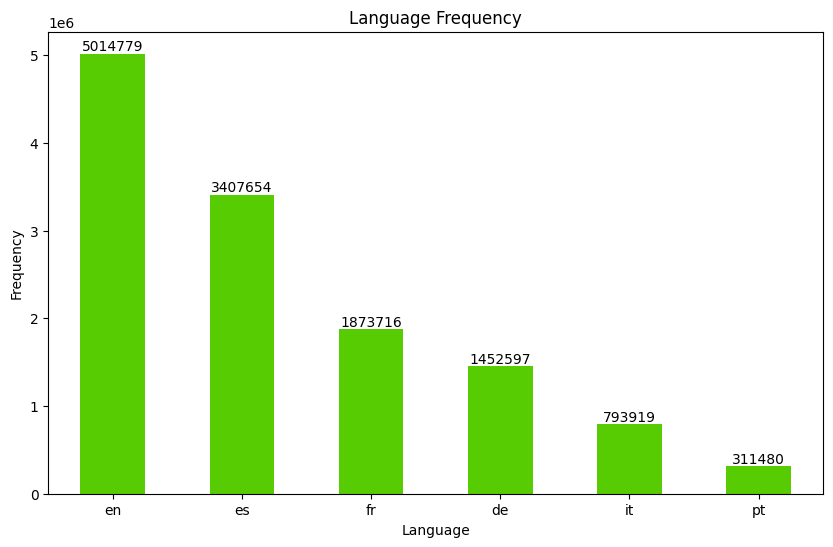

In [11]:
#CEHCKING THE FREQUENCY THAT EACH LANGUAGE IS BEING LEARNED, FOR THIS WE ARE GOING TO ANALYZE THE LEARNING LANGUGE COLUMN

language_counts = df["learning_language"].value_counts() #IT'LL CREATE A PANDAS SERIES WITH THE LANGUAGE AND THE AMOUNT OF OCURRENCY

#PLOTING THE GRAPHIC USING MATPLOTLIB

#defininng size, kind of graphic and color
plt.figure(figsize=(10,6))
language_counts.plot(kind= "bar", color="#57cc02")

#defining title and legend
plt.title("Language Frequency")
plt.xlabel("Language")
plt.xticks(rotation=0)
plt.ylabel("Frequency")

#adding the ocurrency of each language above the graphic
for index, value in enumerate(language_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

As we can see, the most learned language on Duolingo is English and Portuguese is the least learned. So, as a company, I would invest more time and financial resources improving Duolingo for the most learned languages ​​rather than the least learned ones. Obviously, an analysis of growth, month by month, in the number of students of each language is also valid, as it generates a projection for the company.

In [12]:
#CREATING A NEW COLUMN TO SUPPORT THE ANALYSIS OF THE PERFECT RATE 

# Function to compare values and return 1 if equal, 0 otherwise
def compare_values(row):
    if row["session_seen"] == row["session_correct"]:
        return 1
    else:
        return 0

# Apply the function to create a new column
df["perfect_concluded"] = df.apply(compare_values, axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

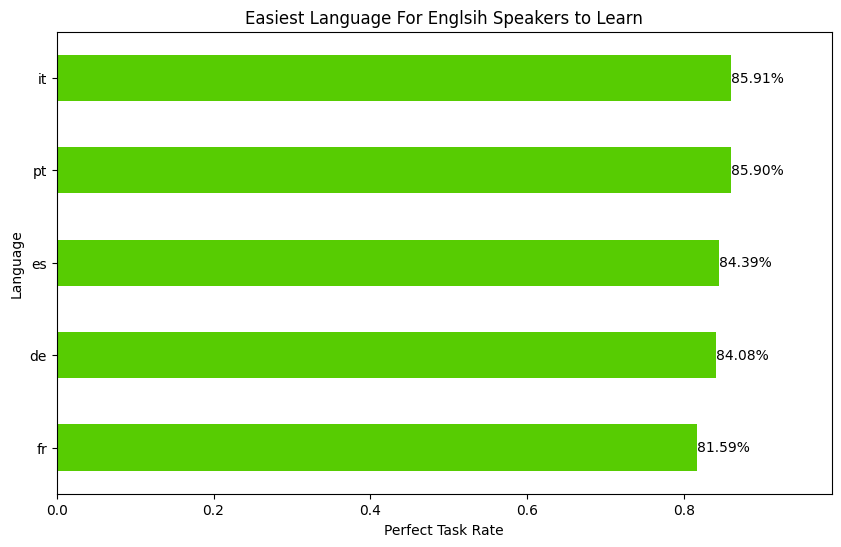

In [13]:
#EASIEST LANGUAGES TO LEARN FOR ENGLISH SPEAKERS

df_en = df[df["ui_language"]=="en"]
perfection_rate = df_en.groupby("learning_language")["perfect_concluded"].mean()

perfection_rate = perfection_rate.sort_values(ascending=True)

#creating the graphic
#defininng size, kind of graphic and color
plt.figure(figsize=(10,6))
perfection_rate.plot(kind= "barh", color="#57cc02")

#defining title and legend
plt.title("Easiest Language For Englsih Speakers to Learn")
plt.xlabel("Perfect Task Rate")
plt.xticks(rotation=0)
plt.ylabel("Language")
plt.margins(x=.15)

#adding the perfect_rate in each graphic
for index, value in enumerate(perfection_rate):
    plt.text(value, index, f"{value:.2%}", ha='left', va='center')

plt.show

We can see that the easiest language for Eglish Native Speakers to learn is Italian and the hardest one is French

In [14]:
#IDENTIFYING THE HARDEST GRAMMATICAL PARTS

#WE HAVE: prn - pronoun, n - noun, det - determinative, adj - adjective, adv - adverb, vb - verb, ij - interjection, pr - preposition, cnjcoo - conjunction, num - number.

#For me, this was the hardest part of the project. 
#Because I was splliting the column in three other columns to take the letter and then classify it in a grammatical part
#I was facing too many errors and taking too long to load it (13million lions + 3 columns more)
#Because I was struggling a lot in this part, I decided to take this code part from the creator and he was a GENIUS!!

#My original idea was: 
#1° Step - water/water<n><sg>
#2° Step - First Column: water/water< | Second Column: n><sg>
#3° Step - First Column: water/water< | Second Column: n | Third Column: ><sg>
#4° Step - Classify the second column. In this case n - noun 


aux_list = list() #creating a list
for part in df['lexeme_string'].values: #checking parts of the string
    if 'prn>' in part:
        aux_list.append('pronoun')
    elif 'n>' in part:
        aux_list.append('noun')
    elif 'det>' in part:
        aux_list.append('determinative')
    elif 'adj>' in part:
        aux_list.append('adjective')
    elif 'adv>' in part:
        aux_list.append('adverb')
    elif '<vb' in part:
        aux_list.append('verb')
    elif 'ij>' in part:
        aux_list.append('interjection')
    elif 'pr>' in part:
        aux_list.append('preposition')
    elif 'cnjcoo>' in part:
        aux_list.append('conjunction')
    elif 'num>' in part:
        aux_list.append('number')
    else:
        aux_list.append('n/a')
  
df['gramatical_part'] = aux_list #adding the list to the dateframe


In [15]:
grammatical_frequency = df.groupby("gramatical_part")["perfect_concluded"].count() #checking the frequency that this grammar shows up
grammatical_perfection_rate = df.groupby("gramatical_part")["perfect_concluded"].mean() #checking the perfection_rate of this grammar


In [16]:
#COMPARING GRAMATICAL FREQUENCY AND GRAMATICAL PERFECTION RATE 

df2 = pd.DataFrame({"grammatical_frequency": grammatical_frequency, "grammatical_perfection_rate": grammatical_perfection_rate})

df2 = df2.sort_values(by="grammatical_perfection_rate", ascending=False)

print(df2)


                 grammatical_frequency  grammatical_perfection_rate
gramatical_part                                                    
interjection                    130300                     0.910422
adjective                       711633                     0.861783
number                           35643                     0.861628
noun                           5509588                     0.854148
verb                           2895348                     0.833326
adverb                          512446                     0.830829
n/a                             108726                     0.822462
pronoun                        1047255                     0.818013
preposition                     348093                     0.816696
determinative                  1398803                     0.803689
conjunction                     156310                     0.775197


Noun, Verbs and Pronouns are the words with the most lessons within Duolingo. This is to be expected, since they are the main structures of a sentence. Furthermore, conjunctions are the words with the highest error rate in tasks (you practice 35x more nouns than conjunctions). I'm learning German, and I realize that I also have this difficulty with conjunctions, but I recognize their importance for the flow of texts and sentences.

In [17]:
#THE FOLLOWING PART WAS VERY HARD, BECAUSE IT WAS HAPPENING SO MANY BUGS.
#BUT THE GOAL OF IT IS TO ANALYZE IN WHICH PERIOD THE APP IS USED THE MOST AMONG THE USERS

df_time = df[["timestamp", "delta"]]

display(df_time)

,timestamp,delta
0,1362076081,27649635
1,1362076081,27649635
2,1362076081,27649635
3,1362076081,27649635
4,1362076081,27649635
...,...,...
12854221,1363104897,368
12854222,1363104897,368
12854223,1363104897,368
12854224,1363104897,368


In [18]:
#WORKING WITH THE PERIOD OF TIME

#I was facing a problem, so I needed to create the new dataframe with two columns and then delete one of these columns
df_time["timestamp"] = pd.to_datetime(df_time["timestamp"], unit='s') #converting the timestamp into a date

df_time = df_time.drop(columns = ["delta"])

df_time["timestamp"] = df_time["timestamp"].astype(str) 
df_time[["day", "time"]] = df_time["timestamp"].str.split(" ", expand=True)
df_time["time"] = df_time["time"].str[:2] #taking only the two first characters of the string

#ANALYZING THE NUMBER OF TASKS MADE IN EACH PERIOD OF TIME

hours_count = df_time.groupby("time")["timestamp"].count()

C:\Users\lucal\AppData\Local\Temp\ipykernel_16732\2433347934.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time["timestamp"] = pd.to_datetime(df_time["timestamp"], unit='s') #converting the timestamp into a date


<function matplotlib.pyplot.show(close=None, block=None)>

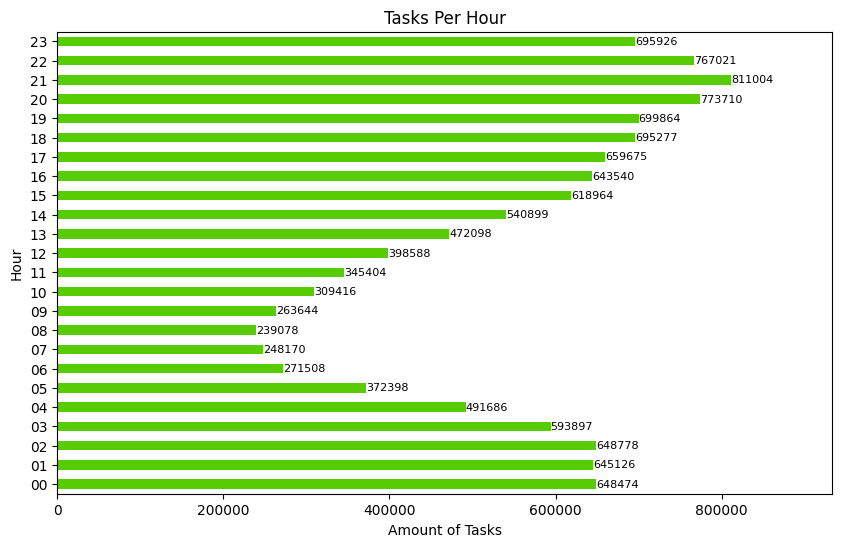

In [19]:
#PLOTTING THE HORIZONTAL GRAPHIC

#defininng size, kind of graphic and color
plt.figure(figsize=(10,6))
hours_count.plot(kind= "barh", color="#57cc02")

#defining title and legend
plt.title("Tasks Per Hour")
plt.xlabel("Amount of Tasks")
plt.xticks(rotation=0)
plt.ylabel("Hour")
plt.margins(x=.15)

#adding the perfect_rate in each graphic
for index, value in enumerate(hours_count):
    plt.text(value, index, str(value), ha='left', va='center', fontsize = 8)

plt.show

Analyzing the graphs, it is clear that the period with the greatest number of tasks being performed is between 2:00 pm and 3:00 am. With an even greater peak between the times of 8:00 pm, 9:00 pm and 10:00 pm. With this in mind, as a company I would notify users who have not yet completed activities on the day that they did an activity during that time. This way, the chance of them completing a task, seeing value in the app and not canceling their subscription would increase.

In [20]:
#CHECKING THE CONSECUTIVE DAYS ENGAGEMENT

df_aux = df[["timestamp","user_id"]]
df_aux["date"] = pd.to_datetime(df["timestamp"], unit = "s")
df_aux["date"] = df_aux["date"].astype(str)
df_aux[["date", "time"]] = df_aux["date"].str.split(" ", expand=True)

C:\Users\lucal\AppData\Local\Temp\ipykernel_16732\4077151773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["date"] = pd.to_datetime(df["timestamp"], unit = "s")
C:\Users\lucal\AppData\Local\Temp\ipykernel_16732\4077151773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux["date"] = df_aux["date"].astype(str)
C:\Users\lucal\AppData\Local\Temp\ipykernel_16732\4077151773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [21]:
#df_aux[["date", "time"]] = df_aux["date"].str.split(" ", expand=True)
df_aux = df_aux.drop(columns = ["time","timestamp"])
display(df_aux)

,user_id,date
0,u:FO,2013-02-28
1,u:FO,2013-02-28
2,u:FO,2013-02-28
3,u:FO,2013-02-28
4,u:FO,2013-02-28
...,...,...
12854221,u:i5D8,2013-03-12
12854222,u:i5D8,2013-03-12
12854223,u:i5D8,2013-03-12
12854224,u:i5D8,2013-03-12


In [22]:
duplicate = df_aux[df_aux.duplicated() == True] #CHECKING MY DUPLICATES
display(duplicate)

,user_id,date
1,u:FO,2013-02-28
2,u:FO,2013-02-28
3,u:FO,2013-02-28
4,u:FO,2013-02-28
5,u:FO,2013-02-28
...,...,...
12854221,u:i5D8,2013-03-12
12854222,u:i5D8,2013-03-12
12854223,u:i5D8,2013-03-12
12854224,u:i5D8,2013-03-12


In [23]:
#DROPING MY DUPLICATES

df_aux.drop_duplicates(inplace = True) 

In [24]:
display(df_aux)

,user_id,date
0,u:FO,2013-02-28
7,u:dDwF,2013-02-28
64,u:g3WM,2013-02-28
87,u:dwbJ,2013-02-28
94,u:fxGh,2013-02-28
...,...,...
12853932,u:figN,2013-03-12
12853959,u:f_W4,2013-03-12
12853994,u:i8m1,2013-03-12
12854016,u:h8_Y,2013-03-12


In [25]:
df_aux['sequence_end'] = ~(df_aux['date'] + timedelta(days=1) == df_aux.groupby(['user_id'])['date'].shift(1))
df_aux['sequence_start'] = ~(df_aux['date'] - timedelta(days=1) == df_aux.groupby(['user_id'])['date'].shift(-1))

df_aux_2 = df_aux[df_aux['sequence_start']==True][['user_id', 'date']].reset_index(drop=True)
df_aux_2.columns = ['user_id', 'sequence_start'] 
df_aux_2['sequence_end'] = df_aux[df_aux['sequence_end']==True].reset_index()['date']
df_aux_2[['sequence_start', 'sequence_end']] = df_aux_2[['sequence_start', 'sequence_end']].apply(pd.to_datetime)
df_aux_2['sequence_length'] = (df_aux_2['sequence_end'] - df_aux_2['sequence_start']).dt.days + 1
df_aux_2.sort_values(by=['sequence_length'], inplace=True, ascending=False)

TypeError: unsupported operand type(s) for +: 'Timedelta' and 'str'